## **DÍAS FESTIVOS:** DEMANDA Y TEMPERATURA

#### **1) Importamos libreria útiles:**

In [629]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="darkgrid")
maxScatter = 3000

#### **2) Cargamos datos:**

- Comprobamos que trabajamos en el directorio correcto y cargamos datos de carpeta "data":

In [630]:
dir = os.getcwd()
DIR = dir
print('Current working directory:', os.getcwd())


# Nos guardamos los datos que queremos en un dataframe usando pandas
dataframe = pd.read_csv('..\data\G02_DATOS_DEM_G1.csv', sep=',', verbose=True)
dataframe['FECHA'] = pd.to_datetime(dataframe['FECHA'], format='%d/%m/%Y')

# Los domingos son días semana 1, para facilitar el estudio, haremos que
# lunes sean DIASEM = 1 y domingos sean DIASEM = 7.
def permutar_DIASEM(x):
    return (x + 5) % 7 + 1

dataframe['DIASEM'] = dataframe['DIASEM'].apply(permutar_DIASEM)
dataframe

Current working directory: c:\Users\serov\Documents\GitHub\TRABAJO-1-ESTADISTICA-DESCRIPTIVA\notebooks
Tokenization took: 1.00 ms
Type conversion took: 1.61 ms
Parser memory cleanup took: 0.00 ms


,FECHA,DEM,TMAX,TMIN,FEST,ANNO,MES,DIA,DIASEM
0,2014-01-01,695.150000,14.500000,4.900000,1,2014,1,1,3
1,2014-01-02,848.520000,17.900000,8.300000,0,2014,1,2,4
2,2014-01-03,842.250000,18.000000,10.800000,0,2014,1,3,5
3,2014-01-04,790.870000,14.800000,9.900000,0,2014,1,4,6
4,2014-01-05,765.880000,15.500000,8.300000,0,2014,1,5,7
...,...,...,...,...,...,...,...,...,...
2950,2022-01-29,897.963540,14.928054,7.128469,0,2022,1,29,6
2951,2022-01-30,883.656025,14.921389,7.131950,0,2022,1,30,7
2952,2022-01-31,1016.937007,14.914723,7.135431,0,2022,1,31,1
2953,2022-02-01,1014.929731,14.908058,7.138912,0,2022,2,1,2


In [631]:
# Para comprobar que los datos están bien.
dataframe.describe(include=float)

,DEM,TMAX,TMIN
count,2955.000000,2955.000000,2955.000000
mean,746.765411,21.339690,13.614605
std,172.909338,5.699953,6.254456
min,419.120000,7.200000,-0.700000
25%,614.090000,16.500000,8.300000
50%,701.080000,20.700000,13.000000
75%,883.440000,26.400000,19.100000
max,1298.008083,37.000000,27.300000


#### **3) ¿Cuántos días festivos hay?**

- Creamos un gráfico en el que se compare el número de días festivos con el número de días no-festivos:

<function matplotlib.pyplot.show(close=None, block=None)>

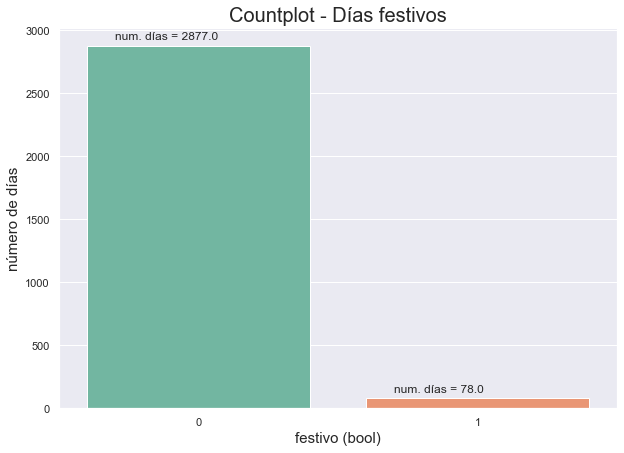

In [632]:
fig = plt.figure(1, figsize=(10, 7))

DF_countplot = sns.countplot(x='FEST', data=dataframe, palette="Set2")

for patch in DF_countplot.patches:
    DF_countplot.annotate('num. días = {:.1f}'.format(patch.get_height()), (patch.get_x()+0.1, patch.get_height()+50))

plt.title("Countplot - Días festivos", fontsize = 20)
plt.xlabel("festivo (bool)", fontsize = 15)
plt.ylabel("número de días", fontsize = 15)
plt.savefig('../reports/figures/Countplot - Días festivos.png', bbox_inches='tight')
plt.show

In [633]:
# Calculamos el porcentaje de días festivos:
pc_dfest = 78*100/2955
print(f'Porcentaje de días festivos = {pc_dfest}%')

Porcentaje de días festivos = 2.6395939086294415%


    La gran minoría de días son festivos. Solo 78 de los 2955 son festivos, aproximadamente un 2.64% de los días.

#### **4) ¿Hay mayor demanda energética en días festivos?**

- Creamos dos dataframes, uno para los días festivos y otro para los no festivos:

In [634]:
dataframe_dias_no_festivos = dataframe[dataframe['FEST'] == 0]
dataframe_dias_festivos = dataframe[dataframe['FEST'] == 1]

- Realizamos una breve descripción de ambos para comparar medias

In [635]:
dataframe_dias_no_festivos.describe(include=[float])

,DEM,TMAX,TMIN
count,2877.000000,2877.000000,2877.000000
mean,748.448778,21.400516,13.683371
std,173.266813,5.709569,6.267783
min,419.120000,7.200000,-0.700000
25%,615.030000,16.600000,8.300000
50%,702.116444,20.800000,13.100000
75%,886.240000,26.500000,19.200000
max,1298.008083,37.000000,27.300000


In [636]:
dataframe_dias_festivos.describe(include=[float])

,DEM,TMAX,TMIN
count,78.000000,78.000000,78.000000
mean,684.675096,19.096154,11.078205
std,147.148410,4.855535,5.167120
min,448.790000,8.500000,1.800000
25%,573.695000,16.125000,7.050000
50%,663.110000,17.950000,10.050000
75%,793.355000,21.950000,13.375000
max,1050.360000,30.000000,24.600000


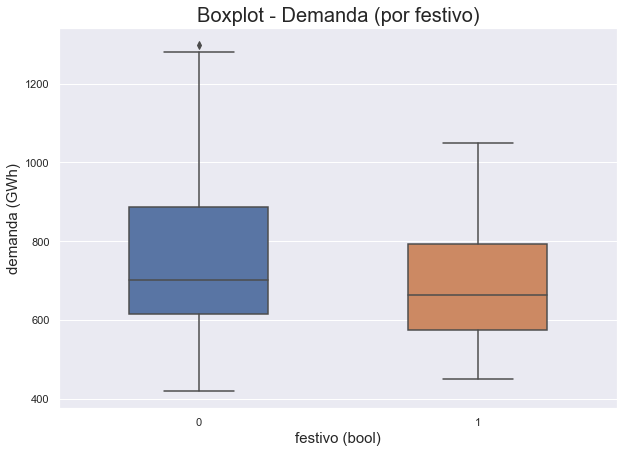

In [637]:
# DEMANDA / DIASEM
fig = plt.figure(2, figsize=(10,7))

DEM_boxplot_diasem = sns.boxplot(y='DEM', x='FEST', 
                 data=dataframe, 
                 width=0.5)

plt.title("Boxplot - Demanda (por festivo)", fontsize = 20)
plt.xlabel("festivo (bool)", fontsize = 15)
plt.ylabel("demanda (GWh)", fontsize = 15)
plt.savefig('../reports/figures/Boxplot - Demanda (por festivo)', bbox_inches='tight')
plt.show()

    En días festivos el promedio de la demanda, temperatura máxima y mínima es menor que en días no festivos

#### **5) ¿Se deben los resultados del apartado 4) a una casualidad?**

##### **5.1) ¿En qué meses caen los días festivos?**

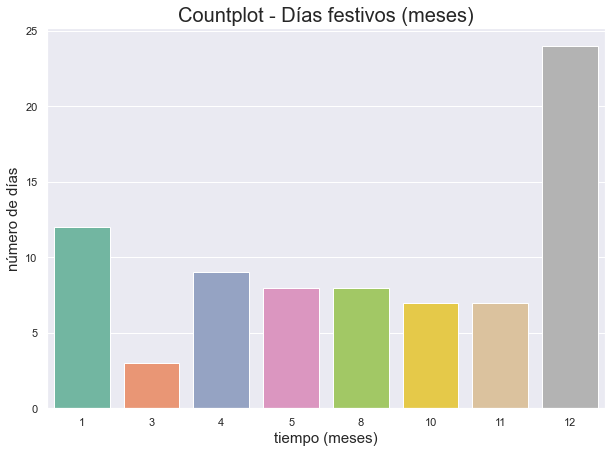

In [638]:
fig = plt.figure(3, figsize=(10, 7))

DF_meses_countplot = sns.countplot(x='MES', data=dataframe_dias_festivos, palette="Set2")

plt.title("Countplot - Días festivos (meses)", fontsize = 20)
plt.xlabel("tiempo (meses)", fontsize = 15)
plt.ylabel("número de días", fontsize = 15)
plt.savefig('../reports/figures/Countplot - Días festivos (meses)', bbox_inches='tight')
plt.show()

    La mayoría de días festivos coincide con vacaciones. ¿Hay en vacaciones un menor consumo energético?

##### **5.2) ¿Tiene que esto alguna relación con el mundo laboral?**

- Para estudiar esto consideremos que el trabajador promedio en España (lugar sobre el que se realiza el estudio), trabaja de lunes a viernes. Por esta consideración, sábado y domingo serían "días festivos". Creamos entonces un dataframe que incluya días festivos junto a sábados y domingos.

In [639]:
dataframe_sab_dom = dataframe[dataframe['DIASEM'] >= 6]

# Unimos con días festivos
dataframe_no_laborales = pd.concat([dataframe_dias_festivos, dataframe_sab_dom]).sort_values(by='FECHA')
# Quitamos duplicados
dataframe_no_laborales = dataframe_no_laborales.drop_duplicates()
dataframe_no_laborales

,FECHA,DEM,TMAX,TMIN,FEST,ANNO,MES,DIA,DIASEM
0,2014-01-01,695.150000,14.500000,4.900000,1,2014,1,1,3
3,2014-01-04,790.870000,14.800000,9.900000,0,2014,1,4,6
4,2014-01-05,765.880000,15.500000,8.300000,0,2014,1,5,7
5,2014-01-06,739.130000,16.300000,8.900000,1,2014,1,6,1
10,2014-01-11,839.590000,14.300000,8.700000,0,2014,1,11,6
...,...,...,...,...,...,...,...,...,...
2937,2022-01-16,978.869821,14.300000,1.700000,0,2022,1,16,7
2943,2022-01-22,968.494797,12.500000,2.100000,0,2022,1,22,6
2944,2022-01-23,961.584784,13.200000,1.600000,0,2022,1,23,7
2950,2022-01-29,897.963540,14.928054,7.128469,0,2022,1,29,6


- Y comparamos con los días laborales:

In [640]:
dataframe_laborales = dataframe[dataframe['FECHA'].isin(dataframe_no_laborales['FECHA']) == False]
dataframe_laborales

,FECHA,DEM,TMAX,TMIN,FEST,ANNO,MES,DIA,DIASEM
1,2014-01-02,848.520000,17.900000,8.300000,0,2014,1,2,4
2,2014-01-03,842.250000,18.000000,10.800000,0,2014,1,3,5
6,2014-01-07,893.450000,16.800000,8.300000,0,2014,1,7,2
7,2014-01-08,929.900000,15.300000,7.300000,0,2014,1,8,3
8,2014-01-09,961.710000,12.900000,5.400000,0,2014,1,9,4
...,...,...,...,...,...,...,...,...,...
2948,2022-01-27,1074.717370,14.941385,7.121506,0,2022,1,27,4
2949,2022-01-28,1035.004033,14.934720,7.124987,0,2022,1,28,5
2952,2022-01-31,1016.937007,14.914723,7.135431,0,2022,1,31,1
2953,2022-02-01,1014.929731,14.908058,7.138912,0,2022,2,1,2


In [641]:
dataframe_laborales.describe(include=float)

,DEM,TMAX,TMIN
count,2043.000000,2043.000000,2043.000000
mean,784.072975,21.391330,13.696801
std,169.027809,5.732353,6.257318
min,504.540000,7.200000,-0.600000
25%,642.005000,16.550000,8.300000
50%,723.660000,20.800000,13.000000
75%,926.345000,26.400000,19.200000
max,1298.008083,35.100000,26.700000


In [642]:
dataframe_no_laborales.describe(include=float)

,DEM,TMAX,TMIN
count,912.000000,912.000000,912.000000
mean,663.191561,21.224009,13.430475
std,150.969665,5.628098,6.247543
min,419.120000,8.100000,-0.700000
25%,536.180000,16.400000,8.200000
50%,610.365156,20.500000,12.800000
75%,787.680000,26.177482,19.000000
max,1156.426368,37.000000,27.300000


    Las temperaturas en días no laborales se mantienen similares como era de esperar, pero la demanda es cierto que baja casi un 6% del promedio en días laborales.

- Para confirmar esto, ignorando los días festivos (minoría), veamos cómo se distribuyen las demandas en cada día de la semana:

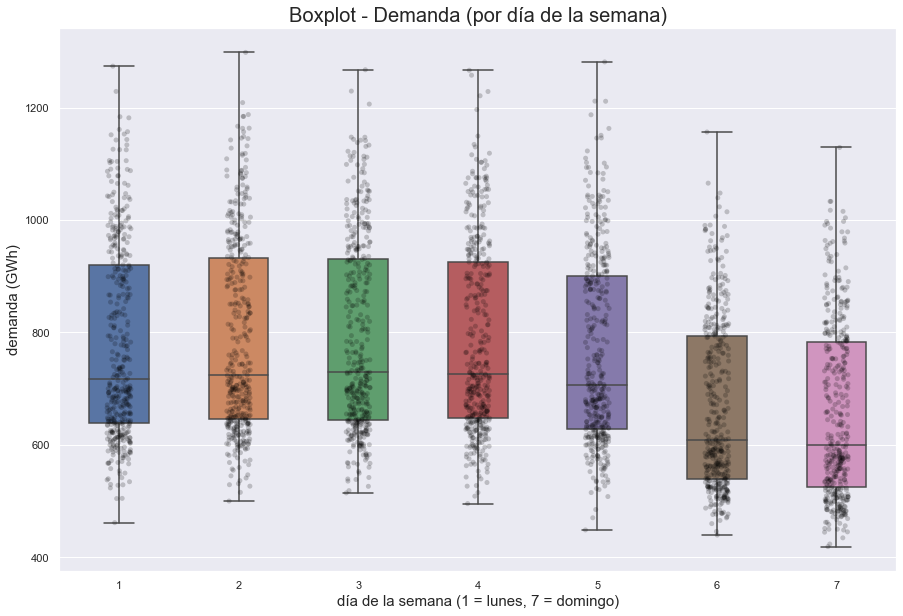

In [643]:
# DEMANDA / DIASEM
fig = plt.figure(4, figsize=(15,10))

DEM_boxplot_diasem = sns.boxplot(y='DEM', x='DIASEM', 
                 data=dataframe, 
                 width=0.5)

if(len(dataframe) <= maxScatter):
    DEM_boxplot_diasem=sns.stripplot(y='DEM', x='DIASEM', 
                       data=dataframe, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black')

plt.title("Boxplot - Demanda (por día de la semana)", fontsize = 20)
plt.xlabel("día de la semana (1 = lunes, 7 = domingo)", fontsize = 15)
plt.ylabel("demanda (GWh)", fontsize = 15)
plt.savefig('../reports/figures/Boxplot - Demanda (por día de la semana)', bbox_inches='tight')
plt.show()

    Es muy probable que en días no laborales la gente demande menos energía (falta de trabajo, salir de casa, ...)

##### **5.3) ¿Qué pasa en los puentes de vacaciones?**

- Agregamos a nuestro dataframe una columna más que indique si el día en cuestión forma parte de una puente o no.

In [644]:
# Insertamos una nueva columna llamada 'PUENTE' en la que 1 significa,
# pertenecer a un puente, y 0 no pertenecer.
dataframe.insert(5, 'PUENTE', 0)

# Contemos que sábados y domingos son festivos para facilitar la detección
# de puentes.
dataframe.loc[dataframe['DIASEM'] >=6, 'FEST'] = 1
dataframe

,FECHA,DEM,TMAX,TMIN,FEST,PUENTE,ANNO,MES,DIA,DIASEM
0,2014-01-01,695.150000,14.500000,4.900000,1,0,2014,1,1,3
1,2014-01-02,848.520000,17.900000,8.300000,0,0,2014,1,2,4
2,2014-01-03,842.250000,18.000000,10.800000,0,0,2014,1,3,5
3,2014-01-04,790.870000,14.800000,9.900000,1,0,2014,1,4,6
4,2014-01-05,765.880000,15.500000,8.300000,1,0,2014,1,5,7
...,...,...,...,...,...,...,...,...,...,...
2950,2022-01-29,897.963540,14.928054,7.128469,1,0,2022,1,29,6
2951,2022-01-30,883.656025,14.921389,7.131950,1,0,2022,1,30,7
2952,2022-01-31,1016.937007,14.914723,7.135431,0,0,2022,1,31,1
2953,2022-02-01,1014.929731,14.908058,7.138912,0,0,2022,2,1,2


In [645]:
# Creamos un dataframe temporal en el que indexemos los puentes correctamente.
temp_dataframe = pd.DataFrame()
# Hacemos grupos con los que contengan consecutivamente el mismo.
groupby_puente = dataframe.groupby((dataframe['FEST'].shift() != dataframe['FEST']).cumsum())

for index, rows in groupby_puente:
    # Si es puente (más de dos días festivos)...
    if len(rows) > 2 and rows.iloc[0]['FEST'] == 1:
        # Cambia el valor de 'PUENTE'
        rows['PUENTE'] = 1
        print('[group_{}]'.format(index))
        print(rows)
        print('\n')
    # Agregamos los nuevos grupos a nuestro dataframe temporal:
    temp_dataframe = temp_dataframe.append(rows, ignore_index=True)

dataframe_puentes = temp_dataframe      # Sustituimos

[group_3]
       FECHA     DEM  TMAX  TMIN  FEST  PUENTE  ANNO  MES  DIA  DIASEM
3 2014-01-04  790.87  14.8   9.9     1       1  2014    1    4       6
4 2014-01-05  765.88  15.5   8.3     1       1  2014    1    5       7
5 2014-01-06  739.13  16.3   8.9     1       1  2014    1    6       1


[group_33]
         FECHA     DEM  TMAX  TMIN  FEST  PUENTE  ANNO  MES  DIA  DIASEM
106 2014-04-17  526.59  18.8  13.3     1       1  2014    4   17       4
107 2014-04-18  470.34  20.4  12.5     1       1  2014    4   18       5
108 2014-04-19  470.11  18.1  13.4     1       1  2014    4   19       6
109 2014-04-20  460.43  17.3  11.9     1       1  2014    4   20       7


[group_69]
         FECHA     DEM  TMAX  TMIN  FEST  PUENTE  ANNO  MES  DIA  DIASEM
226 2014-08-15  448.79  26.4  21.0     1       1  2014    8   15       5
227 2014-08-16  439.64  25.8  20.0     1       1  2014    8   16       6
228 2014-08-17  419.12  27.0  21.0     1       1  2014    8   17       7


[group_101]
         

In [646]:
dataframe_puentes

,FECHA,DEM,TMAX,TMIN,FEST,PUENTE,ANNO,MES,DIA,DIASEM
0,2014-01-01,695.150000,14.500000,4.900000,1,0,2014,1,1,3
1,2014-01-02,848.520000,17.900000,8.300000,0,0,2014,1,2,4
2,2014-01-03,842.250000,18.000000,10.800000,0,0,2014,1,3,5
3,2014-01-04,790.870000,14.800000,9.900000,1,1,2014,1,4,6
4,2014-01-05,765.880000,15.500000,8.300000,1,1,2014,1,5,7
...,...,...,...,...,...,...,...,...,...,...
2950,2022-01-29,897.963540,14.928054,7.128469,1,0,2022,1,29,6
2951,2022-01-30,883.656025,14.921389,7.131950,1,0,2022,1,30,7
2952,2022-01-31,1016.937007,14.914723,7.135431,0,0,2022,1,31,1
2953,2022-02-01,1014.929731,14.908058,7.138912,0,0,2022,2,1,2


- Veamos si en los puentes la demanda es mayor o menor:

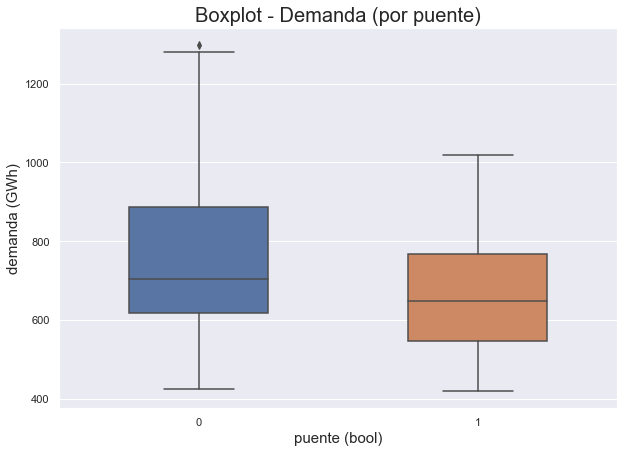

In [647]:
# DEMANDA / DIASEM
fig = plt.figure(2, figsize=(10,7))

DEM_boxplot_diasem = sns.boxplot(y='DEM', x='PUENTE', 
                 data=dataframe_puentes, 
                 width=0.5)

plt.title("Boxplot - Demanda (por puente)", fontsize = 20)
plt.xlabel("puente (bool)", fontsize = 15)
plt.ylabel("demanda (GWh)", fontsize = 15)
plt.savefig('../reports/figures/Boxplot - Demanda (por puente)', bbox_inches='tight')
plt.show()

In [648]:
dataframe_puentes.loc[dataframe_puentes['PUENTE'] == 1].describe()

,DEM,TMAX,TMIN,FEST,PUENTE,ANNO,MES,DIA,DIASEM
count,111.000000,111.000000,111.000000,111.0,111.0,111.000000,111.000000,111.000000,111.000000
mean,666.320235,19.166824,11.123267,1.0,1.0,2017.387387,7.261261,12.531532,5.306306
std,145.701616,4.578624,5.049903,0.0,0.0,2.347808,4.051289,9.703626,1.985368
min,419.120000,8.500000,1.400000,1.0,1.0,2014.000000,1.000000,1.000000,1.000000
25%,547.003764,16.250000,7.400000,1.0,1.0,2015.000000,4.000000,4.000000,5.000000
50%,648.562324,18.400000,10.900000,1.0,1.0,2017.000000,8.000000,10.000000,6.000000
75%,766.685000,21.850000,13.950000,1.0,1.0,2020.000000,12.000000,20.000000,7.000000
max,1018.691031,32.500000,25.400000,1.0,1.0,2021.000000,12.000000,31.000000,7.000000


- ¿Afecta en algo que haya varios días festivos seguidos?

In [649]:
ctemp_dataframe = pd.DataFrame()
groupby_puente = dataframe.groupby((dataframe['FEST'].shift() != dataframe['FEST']).cumsum())

for index, rows in groupby_puente:
    if rows.iloc[0]['FEST'] == 1:
        rows['PUENTE'] = len(rows)
    ctemp_dataframe = ctemp_dataframe.append(rows, ignore_index=True)

cdataframe_puentes = ctemp_dataframe      # Sustituimos
cdataframe_puentes

,FECHA,DEM,TMAX,TMIN,FEST,PUENTE,ANNO,MES,DIA,DIASEM
0,2014-01-01,695.150000,14.500000,4.900000,1,1,2014,1,1,3
1,2014-01-02,848.520000,17.900000,8.300000,0,0,2014,1,2,4
2,2014-01-03,842.250000,18.000000,10.800000,0,0,2014,1,3,5
3,2014-01-04,790.870000,14.800000,9.900000,1,3,2014,1,4,6
4,2014-01-05,765.880000,15.500000,8.300000,1,3,2014,1,5,7
...,...,...,...,...,...,...,...,...,...,...
2950,2022-01-29,897.963540,14.928054,7.128469,1,2,2022,1,29,6
2951,2022-01-30,883.656025,14.921389,7.131950,1,2,2022,1,30,7
2952,2022-01-31,1016.937007,14.914723,7.135431,0,0,2022,1,31,1
2953,2022-02-01,1014.929731,14.908058,7.138912,0,0,2022,2,1,2


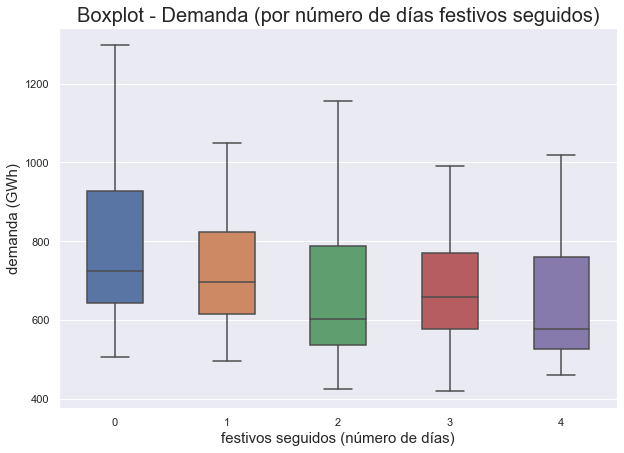

Un puente tiene como mínimo 3 días. Si hay 0 días, significa que no es puente.


In [650]:
# DEMANDA / DIA DE FESTIVOS SEGUIDOS
fig = plt.figure(2, figsize=(10,7))

DEM_boxplot_diasem = sns.boxplot(y='DEM', x='PUENTE', 
                 data=cdataframe_puentes, 
                 width=0.5)

plt.title("Boxplot - Demanda (por número de días festivos seguidos)", fontsize = 20)
plt.xlabel("festivos seguidos (número de días)", fontsize = 15)
plt.ylabel("demanda (GWh)", fontsize = 15)
plt.savefig('../reports/figures/Boxplot - Demanda (por número de días festivos seguidos)', bbox_inches='tight')
plt.show()

print('Un puente tiene como mínimo 3 días. Si hay 0 días, significa que no es puente.')